In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#meta = pd.read_csv('EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv')
gct_full = pd.read_table('EyeGEx_retina.counts.matrix.gct', header = 2,delim_whitespace=True)

In [ ]:
gct_full.head()

In [5]:
gct_full.shape

(58051, 455)

In [6]:
# remove name and description in matrix
gct_name = gct_full[['NAME']]
gct_desc = gct_full[['Description']]
gct_data = gct_full.drop(columns=['NAME','Description'])
gct_data.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,225.00,252.0,136.0,166.0,207.0,121.0,127.0,304.0,227.0,224.0,...,132.0,149.0,186.0,71.0,272.0,136.0,324.0,158.0,168.0,167.0
1,0.00,0.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
2,254.00,301.0,173.0,264.0,307.0,140.0,164.0,279.0,216.0,274.0,...,369.0,148.0,265.0,86.0,326.0,283.0,300.0,242.0,286.0,207.0
3,422.99,510.0,272.0,301.0,417.0,116.0,198.0,278.0,243.0,297.0,...,274.0,163.0,227.0,96.0,418.0,338.0,277.0,342.0,343.0,140.0
4,272.00,310.0,204.0,224.0,227.0,149.0,253.0,171.0,274.0,198.0,...,280.0,168.0,308.0,86.0,284.0,260.0,179.0,210.0,225.0,124.0


In [8]:
zeroGenes = (gct_data.iloc[:, :] == 0).all(axis=1)
filteredData = gct_data.loc[~zeroGenes, :]
print(filteredData.shape)

(45297, 453)


In [10]:
filteredData.info()
# have all 453 patient samples
# 58051 different genes, columns

<class 'pandas.core.frame.DataFrame'>
Index: 45297 entries, 0 to 58049
Columns: 453 entries, 100_2 to 99_1
dtypes: float64(453)
memory usage: 156.9 MB


In [11]:
# need to normalize/scale the data in order to avoud biases with varaibles of larger magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(filteredData)
gct_scaled = scaler.transform(filteredData)
gct_scaled = pd.DataFrame(gct_scaled)
print(gct_scaled.head())
print('mean: ',gct_scaled.mean(axis=0))
print('std: ',gct_scaled.std(axis=0))

        0         1         2         3         4         5         6     
0 -0.044295 -0.033688 -0.040543 -0.056461 -0.043398 -0.068067 -0.044897  \
1 -0.119445 -0.128301 -0.117623 -0.147056 -0.126540 -0.130236 -0.119522   
2 -0.034609 -0.015291 -0.019418 -0.001656 -0.003233 -0.058305 -0.023156   
3  0.021834  0.063178  0.037107  0.019036  0.040949 -0.070636 -0.003178   
4 -0.028597 -0.011912 -0.001718 -0.024025 -0.035365 -0.053681  0.029140   

        7         8         9    ...       443       444       445       446   
0  0.024967 -0.006816  0.002178  ... -0.069406 -0.021737 -0.028900 -0.043769  \
1 -0.109301 -0.108825 -0.110531  ... -0.142431 -0.111704 -0.136727 -0.129856   
2  0.013925 -0.011848  0.027336  ...  0.061706 -0.022341  0.017648 -0.025322   
3  0.013483  0.000503  0.038909  ...  0.009150 -0.013283 -0.004742 -0.013024   
4 -0.033776  0.014684 -0.010904  ...  0.012470 -0.010264  0.042984 -0.025322   

        447       448       449       450       451       452  
0  0

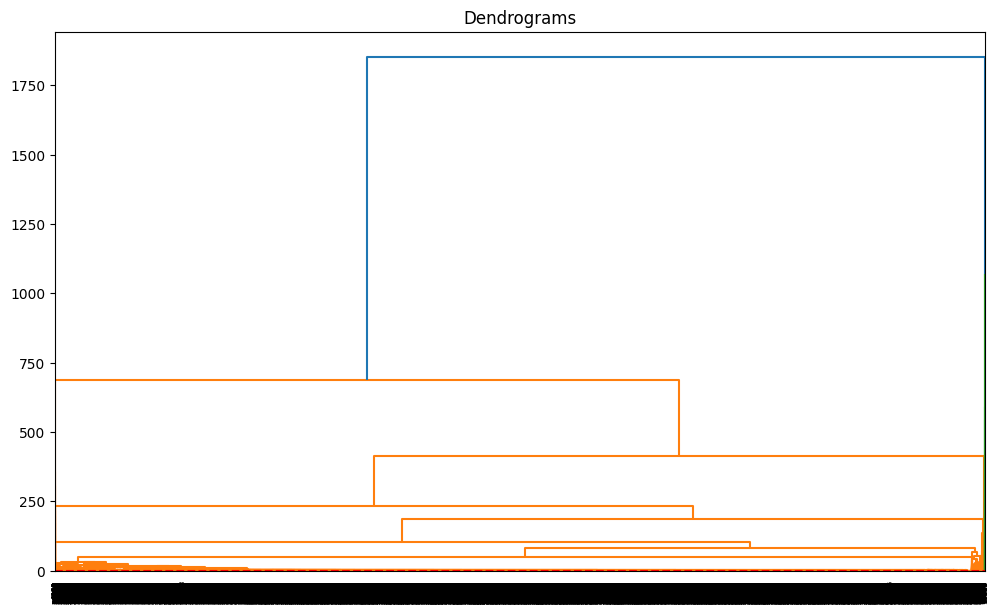

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_scaled, method='complete'))
# x-axis contains the genes
# y-axis contains the distances between these genes

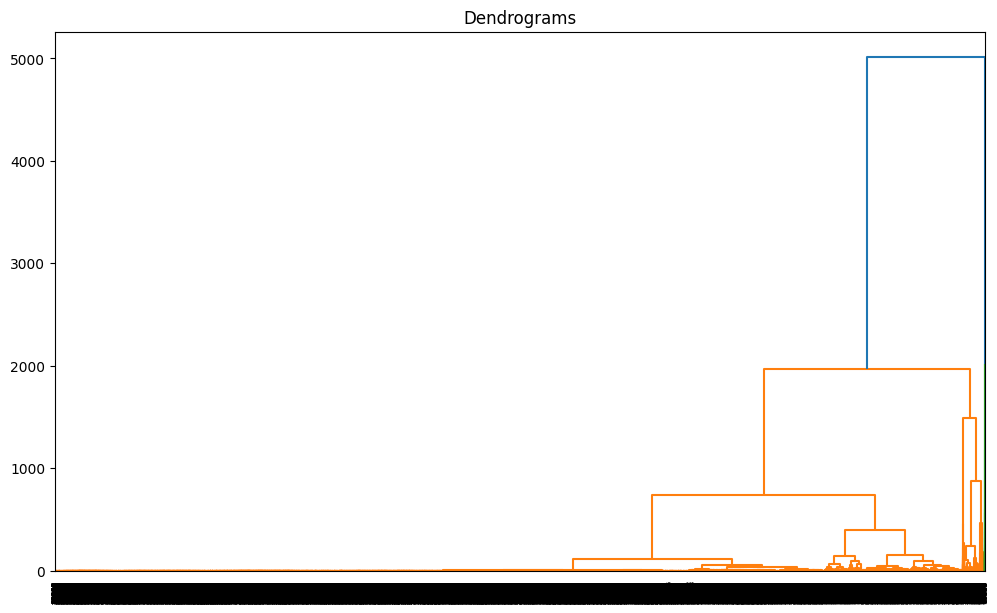

In [14]:
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
# Ward linkage minimizes the variance between clusters
dend = shc.dendrogram(shc.linkage(gct_scaled, method='ward'))

End here?? Don't think the rest is really necessary, not sure what plotting the cluster labels adds since it's only plotting the first two genes and 
can't really visualise a 45000 dimension space

In [ ]:
# largest cluster difference can be decided at distance - 0.6, this resulted in 4 clusters
# we will now perform agglomerative clustering with cluster size = 4
from sklearn.cluster import AgglomerativeClustering
# number of clusters = 4
# metric = this is chosen by calculating the euclidean distance of the center of the cluster
# linkage methods: Ward minimizes the variance between clusters
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')  
clst_assignments = cluster.fit_predict(gct_scaled)
clst_assignments
# we now have an array of cluster assignments for each sample
# we can now plot the using this array

# my questions:
#     What do these clst_assignments tell us? Likelihood for disease?
#     Do we need 4 clst assignmets?
#     Should we remove data that is not informative?


In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(gct_scaled[0], gct_scaled[1], c=cluster.labels_) 

In [ ]:
# largest cluster difference can be decided at distance - 0.6, this resulted in 4 clusters
# we will now perform agglomerative clustering with cluster size = 4
from sklearn.cluster import AgglomerativeClustering
# number of clusters = 4
# metric = this is chosen by calculating the euclidean distance of the center of the cluster
# linkage methods: Ward minimizes the variance between clusters
cluster_two = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')  
clst_assignments_no_scale = cluster_two.fit_predict(gct_data_T)
clst_assignments_no_scale
# we now have an array of cluster assignments for each sample
# we can now plot the using this array
# """
# This is the data without normalizing it, we get two clusters which could be our diseased vs healthy
# """